In [1]:
import os
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pymorphy2
import seaborn as sns
sns.set_style("whitegrid")
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from string import punctuation
from operator import itemgetter

# HW1:  Сравнение стилей текстов
### Выполнили:  Булгаков Дмитрий, Тефикова Алие
### Группа ИАД-2

# 1. Загрузка данных

Составьте самостоятельно как минимум две коллекции
текстов разных стилей (например, коллекция текстов в публицистическом
стиле и коллекция текстов в научном стиле). Коллекции текстов
должны быть достаточно большие (порядка 5000 токенов). Посчитайте
количество токенов и типов в каждой коллекции.

### 1.1 Получение  данных из файла

In [2]:
def remove_control_characters(text_string):
    return ''.join(filter(None, text_string.splitlines()))

### 1.1.1 Загрузка художественных текстов (Портрет Дориана Грея,  Оскар Уайльд)

«Портре́т Дориана Гре́я» (англ. The Picture of Dorian Gray) — единственный опубликованный роман Оскара Уайльда. В жанровом отношении представляет смесь романа воспитания с моральной притчей. Существует в двух версиях — в 13 главах (1890 года) и в 20 главах (1891 года). Стал самым успешным произведением Уайльда, более 30 раз экранизировался.

<b>Link:<b> http://lib.ru/WILDE/doriangray.txt

In [3]:
fiction = open('data/dorian_gray.txt', encoding='utf-8').read()
fiction = remove_control_characters(fiction)

### 1.1.2 Загрузка  публицистических текстов (статьи lenta.ru) 

Lenta.ru — одно из ведущих российских новостных интернет-изданий, основанное в 1999 году Антоном Носиком при содействии Фонда эффективной политики. Работает круглосуточно, освещая мировые и внутрироссийские новости.

<b>Link<b>: http://lenta.ru

In [4]:
journalistic = open('data/lentaru.txt', encoding='utf-8').read()
journalistic = remove_control_characters(journalistic)

### 1.1.3 Загрузка  научных текстов (Молодежная Наука 2016)

Материалы Всероссийской научно-практической конференции молодых ученых, аспирантов и студентов, посвященной 150-летию со дня рождения профессора В.Н. Варгина (Пермь, 14-18 марта 2016 года)

<b>Link<b>: http://pgsha.ru/web/science/scientificarticles/

In [5]:
scientific = open('data/perm_conf.txt', encoding='utf-8').read()
scientific = remove_control_characters(scientific)

### 1.1.4 Загрузка  текстов  разговорного стиля (корпус составленный на базе Twitter )

В качестве источника текстов была выбрана платформа микроблогинга Twitter. Современные поисковые системы и имеющиеся в открытом доступе инструменты по сбору текстовых отзывов не позволяют собирать актуальные отзывы и оперативно работать с данными. В связи с этим на основе программного интерефейса API twitter  был разработан программный инструмент для извлечения отзывов об интересующих товарах, услугах,  событиях,  персонах из микроблоггинг-платформы twitter,  который позволяет учитывать время публикации сообщения и авторитетность автора сообщения. Этот инструмент использовался для сбора неразмеченного корпуса. В корпусе содержится более 15 миллионов записей за время с конца ноября 2013 года до конца февраля 2014 года.

<b>Link:<b> http://study.mokoron.com

In [6]:
conversational = open('data/twitter.txt', encoding='utf-8').read()
conversational = remove_control_characters(conversational)

### 1.2 Подсчет токенов и типов

In [7]:
exclude_symbols = set(punctuation + '0123456789'+u'–—'+u'«»'+u'“')

In [8]:
def tokenize(text, exlude_symb):
    text = text.lower()
    text_merged = ''.join(ch for ch in text if ch not in exlude_symb)
    text_tokens = WhitespaceTokenizer().tokenize(text_merged.lower())
    return text_tokens

In [9]:
def print_results(tokens):
    print('N of tokens: ', len(tokens))
    types = nltk.FreqDist(tokens)
    print('N of types:', len(types))

### 1.2.1 Токены и типы для  художественного стиля

In [10]:
fiction_tokens = tokenize(fiction, exclude_symbols)
print_results(fiction_tokens)

N of tokens:  60528
N of types: 18236


### 1.2.2 Токены и типы для публицистического стиля

In [11]:
journalistic_tokens = tokenize(journalistic, exclude_symbols)
print_results(journalistic_tokens)

N of tokens:  13699
N of types: 6015


### 1.2.3 Токены и типы для  научного стиля

In [12]:
scientific_tokens = tokenize(scientific, exclude_symbols)
print_results(scientific_tokens)

N of tokens:  265376
N of types: 57790


### 1.2.4 Токены и типы для  разговорного стиля

In [13]:
conversational_tokens = tokenize(conversational, exclude_symbols)
print_results(conversational_tokens)

N of tokens:  255367
N of types: 56878


### 2. Подсчет частей речи

### 2.1 Подсчет частоты вхождений слов

In [14]:
stop_words = stopwords.words('russian') + [u'это', u'№', u'гсха', u'это', u'оо', u'изз', u'б']
morph_analyzer = pymorphy2.MorphAnalyzer()

In [15]:
def word_freq_count(tokens, morph, stopwords=None):
    lemmata = nltk.FreqDist()
    types = nltk.FreqDist(tokens)
    
    for t in types:
        l = morph.parse(t)[0].normal_form
        if l in lemmata:
            lemmata[l] += types[t]
        else:
            lemmata[l] = types[t]
                
    if (stopwords != None):
        lemmata = lemmata_remove_stopwords(lemmata, stopwords)
    
    return lemmata

In [16]:
def lemmata_remove_stopwords(lem, stopwords):
    lem_no_sw = nltk.FreqDist()
    for l in lem:
        if not l in stopwords:
            lem_no_sw[l] = lem[l]
    return lem_no_sw

In [17]:
def print_lemata_most_common(lem, count=10):
    print('N of lemmata:', len(lem))
    
    for i in lem.most_common(count):
        print(i[0], i[1])

In [19]:
def perform_count_analysis(tokens, morph, stopwords):
    print('Без исключения стоп-слов:\n')
    lem_no_stop = word_freq_count(tokens, morph)
    print_lemata_most_common(lem_no_stop)
    
    print('\n\nИсключая стоп-слова:\n')
    lem_stop = word_freq_count(tokens, morph, stopwords)
    print_lemata_most_common(lem_stop)

### 2.1.1 Частота вхождений слов для художественного стиля

In [20]:
perform_count_analysis(fiction_tokens, morph_analyzer, stop_words)

Без исключения стоп-слов:

N of lemmata: 11980
и 1914
он 1773
в 1585
я 1477
не 1211
вы 913
что 904
быть 729
на 725
с 689


Исключая стоп-слова:

N of lemmata: 11871
дориан 670
весь 451
человек 296
который 282
свой 277
лорд 253
генри 243
жизнь 226
сказать 225
мочь 196


### 2.1.2 Частота вхождений слов для публицистического стиля

In [21]:
perform_count_analysis(journalistic_tokens, morph_analyzer, stop_words)

Без исключения стоп-слов:

N of lemmata: 4027
в 713
и 299
на 243
что 177
с 174
о 171
год 138
это 135
по 135
не 106


Исключая стоп-слова:

N of lemmata: 3941
год 138
февраль 101
россия 84
который 78
также 51
заявить 42
российский 42
мочь 39
сообщить 38
стать 34


### 2.1.3 Частота вхождений слов для научного стиля

In [22]:
perform_count_analysis(scientific_tokens, morph_analyzer, stop_words)

Без исключения стоп-слов:

N of lemmata: 39007
в 9598
и 9005
на 4623
с 3570
по 2310
год 2245
для 1584
от 1449
что 1329
при 1182


Исключая стоп-слова:

N of lemmata: 38901
год 2245
пермский 1086
который 962
производство 888
являться 812
продукция 804
развитие 727
предприятие 681
хозяйство 674
сельскохозяйственный 651


### 2.1.4 Частота вхождений слов для разговорного стиля

In [23]:
perform_count_analysis(conversational_tokens, morph_analyzer, stop_words)

Без исключения стоп-слов:

N of lemmata: 40435
я 10214
не 7760
в 6501
и 6376
на 4281
что 3477
с 3452
а 3077
весь 3017
ты 2850


Исключая стоп-слова:

N of lemmata: 40319
весь 3017
ещё 1172
хотеть 1125
мочь 916
день 855
сегодня 790
очень 733
просто 669
свой 663
хороший 594


### 2.2 Подсчет количества  слов  с учетом части речи:

Используя любой морфологический процессор, который вам нравится (pymorphy2, mystem), определите к какой части речиотносятся слова из каждой коллекции текстов. При помощи nltk.FreqDist() составьте частотные словари: часть речи – количество слов, к ней относящихся.

| ГрамМЕМа | Значение |
| :-: | :-: |
| NOUN | имя существительное | 
| ADJF | имя прилагательное (полное) | 
| ADJS | имя прилагательное (краткое) | 
| COMP | компаратив | 
| VERB | глагол (личная форма) | 
| INFN | глагол (инфинитив) | 
| PRTF | причастие (полное) | 
| PRTS | причастие (краткое) | 
| GRND | деепричастие | 
| NUMR | числительное | 
| ADVB | наречие | 
| NPRO | предикатив | 
| PRED | предлог | 
| PREP | союз | 
| CONJ | частица | 
| PRCL | имя прилагательное (полное) | 
| INTJ | междометие | 
| OTHR | другое | 

In [24]:
parts_of_speech = ['NOUN', 'ADJF', 'ADJS', 'COMP', 'VERB', 
         'INFN', 'PRTF', 'PRTS', 'GRND', 'NUMR', 
         'ADVB', 'NPRO', 'PRED', 'PREP', 'CONJ',
         'PRCL', 'INTJ', 'OTHR']

In [25]:
def count_parts_of_speech(tokens, morph, parts):
    types = nltk.FreqDist(tokens)
    pos_dict = {}
    for t in types:
        word = morph.parse(t)[0].normal_form
        word_pos = morph.parse(word)[0].tag.POS
        
        if (word_pos == None):
            word_pos = 'OTHR'
        
        if (word_pos in pos_dict.keys()):
            pos_dict[word_pos] += types[t]
        else:
            pos_dict[word_pos] = types[t]
        
    return pos_dict

### 2.2.1 Количество слов с учетом части речи для художественного стиля

In [29]:
f_dict = count_parts_of_speech(fiction_tokens, morph_analyzer, parts_of_speech)
f_dict

{'ADJF': 7597,
 'ADJS': 61,
 'ADVB': 3885,
 'CONJ': 5897,
 'GRND': 61,
 'INFN': 11352,
 'INTJ': 157,
 'NOUN': 15955,
 'NPRO': 6021,
 'NUMR': 237,
 'OTHR': 160,
 'PRCL': 3369,
 'PRED': 318,
 'PREP': 5314,
 'PRTF': 14,
 'PRTS': 5,
 'VERB': 125}

In [30]:
sorted(f_dict.items(), key = itemgetter(1), reverse = True)

[('NOUN', 15955),
 ('INFN', 11352),
 ('ADJF', 7597),
 ('NPRO', 6021),
 ('CONJ', 5897),
 ('PREP', 5314),
 ('ADVB', 3885),
 ('PRCL', 3369),
 ('PRED', 318),
 ('NUMR', 237),
 ('OTHR', 160),
 ('INTJ', 157),
 ('VERB', 125),
 ('ADJS', 61),
 ('GRND', 61),
 ('PRTF', 14),
 ('PRTS', 5)]

### 2.2.2. Количество слов с учетом части речи для публицистического стиля

In [31]:
j_dict = count_parts_of_speech(journalistic_tokens, morph_analyzer, parts_of_speech)
j_dict

{'ADJF': 1796,
 'ADJS': 2,
 'ADVB': 333,
 'CONJ': 746,
 'GRND': 3,
 'INFN': 1917,
 'INTJ': 11,
 'NOUN': 5985,
 'NPRO': 233,
 'NUMR': 83,
 'OTHR': 302,
 'PRCL': 297,
 'PRED': 23,
 'PREP': 1930,
 'PRTF': 14,
 'PRTS': 1,
 'VERB': 23}

In [32]:
sorted(j_dict.items(), key = itemgetter(1), reverse = True)

[('NOUN', 5985),
 ('PREP', 1930),
 ('INFN', 1917),
 ('ADJF', 1796),
 ('CONJ', 746),
 ('ADVB', 333),
 ('OTHR', 302),
 ('PRCL', 297),
 ('NPRO', 233),
 ('NUMR', 83),
 ('PRED', 23),
 ('VERB', 23),
 ('PRTF', 14),
 ('INTJ', 11),
 ('GRND', 3),
 ('ADJS', 2),
 ('PRTS', 1)]

### 2.2.3 Количество слов с учетом части речи для научного стиля

In [33]:
s_dict = count_parts_of_speech(scientific_tokens, morph_analyzer, parts_of_speech)
s_dict

{'ADJF': 47272,
 'ADJS': 102,
 'ADVB': 5697,
 'COMP': 2,
 'CONJ': 15460,
 'GRND': 79,
 'INFN': 24950,
 'INTJ': 381,
 'NOUN': 126169,
 'NPRO': 2197,
 'NUMR': 533,
 'OTHR': 8393,
 'PRCL': 2966,
 'PRED': 542,
 'PREP': 30154,
 'PRTF': 156,
 'PRTS': 10,
 'VERB': 313}

In [34]:
sorted(s_dict.items(), key = itemgetter(1), reverse = True)

[('NOUN', 126169),
 ('ADJF', 47272),
 ('PREP', 30154),
 ('INFN', 24950),
 ('CONJ', 15460),
 ('OTHR', 8393),
 ('ADVB', 5697),
 ('PRCL', 2966),
 ('NPRO', 2197),
 ('PRED', 542),
 ('NUMR', 533),
 ('INTJ', 381),
 ('VERB', 313),
 ('PRTF', 156),
 ('ADJS', 102),
 ('GRND', 79),
 ('PRTS', 10),
 ('COMP', 2)]

### 2.2.4 Количество слов с учетом части речи для разговорного стиля

In [35]:
c_dict = count_parts_of_speech(conversational_tokens, morph_analyzer, parts_of_speech)
c_dict

{'ADJF': 27017,
 'ADJS': 345,
 'ADVB': 21903,
 'COMP': 2,
 'CONJ': 24190,
 'GRND': 149,
 'INFN': 43466,
 'INTJ': 2082,
 'NOUN': 65272,
 'NPRO': 20192,
 'NUMR': 696,
 'OTHR': 4153,
 'PRCL': 18255,
 'PRED': 2184,
 'PREP': 24617,
 'PRTF': 40,
 'PRTS': 34,
 'VERB': 770}

In [36]:
sorted(c_dict.items(), key = itemgetter(1), reverse = True)

[('NOUN', 65272),
 ('INFN', 43466),
 ('ADJF', 27017),
 ('PREP', 24617),
 ('CONJ', 24190),
 ('ADVB', 21903),
 ('NPRO', 20192),
 ('PRCL', 18255),
 ('OTHR', 4153),
 ('PRED', 2184),
 ('INTJ', 2082),
 ('VERB', 770),
 ('NUMR', 696),
 ('ADJS', 345),
 ('GRND', 149),
 ('PRTF', 40),
 ('PRTS', 34),
 ('COMP', 2)]

###  Формирование гипотезы

<center>
${\displaystyle H_{0}}$: В текстах разных стилей частоты частей речи имеют **разный** характер распределения.
<br>
${\displaystyle H_{A}}$: В текстах разных стилей частоты частей речи имеют **одинаковый** характер распределения.
<br>

<br>
</center>
Зададим уровень значимости **$\alpha$ (вероятность ошибки первого рода) = 0.05** относительно которого в дальнейшем будем делать вывод о справедливости гипотезы.
</center>

Также зададим критерий, больше всего подходящий для решения данной задачи - **???**, который представляет собой тестовую статистику применимую для ..

###  Приведение частотных словарей к pandas DataFrame

In [54]:
#превращаем в датафреймы
f_df = pd.DataFrame([f_dict]).T
f_df.rename(columns = {0:'Fiction'}, inplace = True)

j_df = pd.DataFrame([j_dict]).T
j_df.rename(columns = {0:'Journalistic'}, inplace = True)

s_df = pd.DataFrame([s_dict]).T
s_df.rename(columns = {0:'Scientific'}, inplace = True)

c_df = pd.DataFrame([c_dict]).T
c_df.rename(columns = {0:'Conversational'}, inplace = True)

In [55]:
#кароче в этих текстах есть по 2 компаратива, а в остальных нет, надо будет добавить в них 0, но я пока просто дропнула
s_df.drop(['COMP'], inplace=True)
c_df.drop(['COMP'], inplace=True)
#соединяем все в один датафрейм
df1 = s_df.join(c_df)
df2 = f_df.join(j_df)
df = df1.join(df2)

###  Вычисление корреляции Спирмена 

<center>
Коэффициент корреляции Спирмена является мерой линейной связи между случайными величинами. 
<br>
Корреляция Спирмена является ранговой, то есть для оценки силы связи используются не численные значения, а соответствующие им ранги.
<br>
Пусть даны две выборки $x = (x_1,\ldots,x_n),\;\; y = (y_1,\ldots,y_n)$.
<br> 
тогда коэффициент корреляции Спирмена вычисляется по формуле:
<br> 
$$\rho=1-\frac{6}{n(n-1)(n+1)}\sum_{i=1}^n(R_i-S_i)^2,[1]$$ 
<br> 
где 
<br> 
$R_i$ - ранг наблюдения $x_i$ в ряду x, 
<br> 
$S_i$ - ранг наблюдения $y_i$ в ряду y.
<center/>

вообще не особо уверена, что нужно именно так вычислять, но пока других идей у меня нет..

In [56]:
from scipy.stats import spearmanr

In [57]:
spearman = spearmanr(np.array(df['Scientific']), np.array(df['Journalistic']))
print(str('Коэффициент корреляции Спирмена: r = ') + str(spearman[0]) + '\n' + 
      str('Статистическая значимость: p-value = ') + str(spearman[1]))

Коэффициент корреляции Спирмена: r = 0.974862231057
Статистическая значимость: p-value = 3.43059266496e-11


In [58]:
spearman = spearmanr(np.array(df['Scientific']), np.array(df['Conversational']))
print(str('Коэффициент корреляции Спирмена: r = ') + str(spearman[0]) + '\n' + 
      str('Статистическая значимость: p-value = ') + str(spearman[1]))

Коэффициент корреляции Спирмена: r = 0.960784313725
Статистическая значимость: p-value = 9.24915992778e-10


In [59]:
spearman = spearmanr(np.array(df['Conversational']), np.array(df['Journalistic']))
print(str('Коэффициент корреляции Спирмена: r = ') + str(spearman[0]) + '\n' + 
      str('Статистическая значимость: p-value = ') + str(spearman[1]))

Коэффициент корреляции Спирмена: r = 0.941753702455
Статистическая значимость: p-value = 1.7001481581e-08


In [60]:
spearman = spearmanr(np.array(df['Conversational']), np.array(df['Fiction']))
print(str('Коэффициент корреляции Спирмена: r = ') + str(spearman[0]) + '\n' + 
      str('Статистическая значимость: p-value = ') + str(spearman[1]))

Коэффициент корреляции Спирмена: r = 0.962599813056
Статистическая значимость: p-value = 6.51633966695e-10


In [61]:
spearman = spearmanr(np.array(df['Fiction']), np.array(df['Journalistic']))
print(str('Коэффициент корреляции Спирмена: r = ') + str(spearman[0]) + '\n' + 
      str('Статистическая значимость: p-value = ') + str(spearman[1]))

Коэффициент корреляции Спирмена: r = 0.896932515337
Статистическая значимость: p-value = 1.07566911128e-06


In [62]:
spearman = spearmanr(np.array(df['Scientific']), np.array(df['Fiction']))
print(str('Коэффициент корреляции Спирмена: r = ') + str(spearman[0]) + '\n' + 
      str('Статистическая значимость: p-value = ') + str(spearman[1]))

Коэффициент корреляции Спирмена: r = 0.911097657453
Статистическая значимость: p-value = 3.70228511299e-07


**Интерпретация результатов** 

)))0)

###  Визуализация

####  График плотности частоты встречаний частей речи для разных стилей текстов

звучит криво, я знаю аххаха

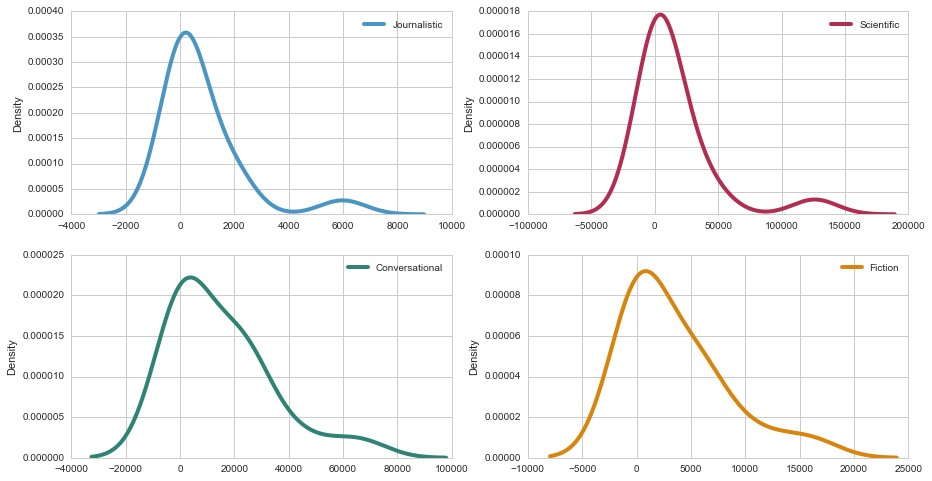

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

j_df.plot(ax=axes[0,0], kind='kde', color='#4A95C4', linewidth= 4) 
s_df.plot(ax=axes[0,1], kind='kde', color='#B22E50', linewidth= 4)
c_df.plot(ax=axes[1,0], kind='kde', color='#2F8375', linewidth= 4)
f_df.plot(ax=axes[1,1], kind='kde', color='#D8850E', linewidth= 4)

Гляда на эти графики, можно сделать вывод, о близости разных стилей текстов. Так, Публицистический стиль близок к Научному, а Разговорный к Художественному.

####  График

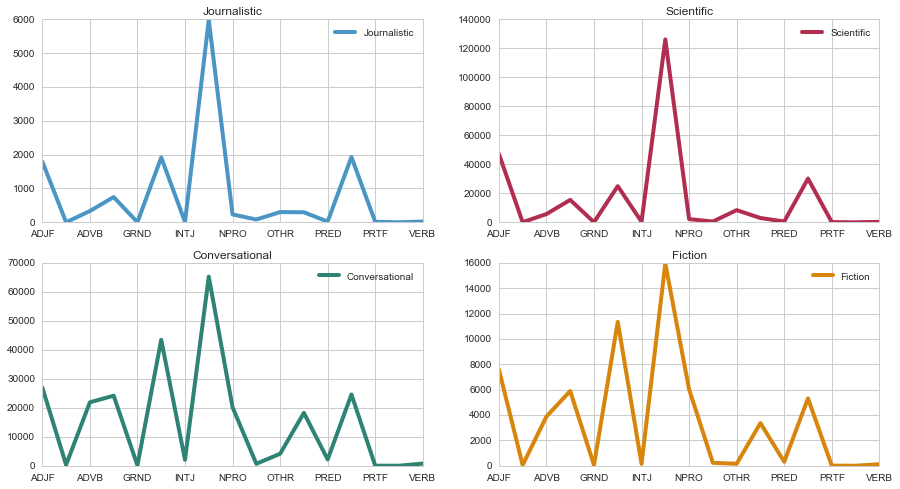

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

j_df.plot(ax=axes[0,0], color='#4A95C4', linewidth= 4); axes[0,0].set_title('Journalistic')

s_df.plot(ax=axes[0,1], color='#B22E50', linewidth= 4); axes[0,1].set_title('Scientific')

c_df.plot(ax=axes[1,0], color='#2F8375', linewidth= 4); axes[1,0].set_title('Conversational')

f_df.plot(ax=axes[1,1], color='#D8850E', linewidth= 4); axes[1,1].set_title('Fiction')

#### еще график
надо оставить либо этот, либо предыдущий, они по смыслу одинаковые 

наверное лучше оставить bar

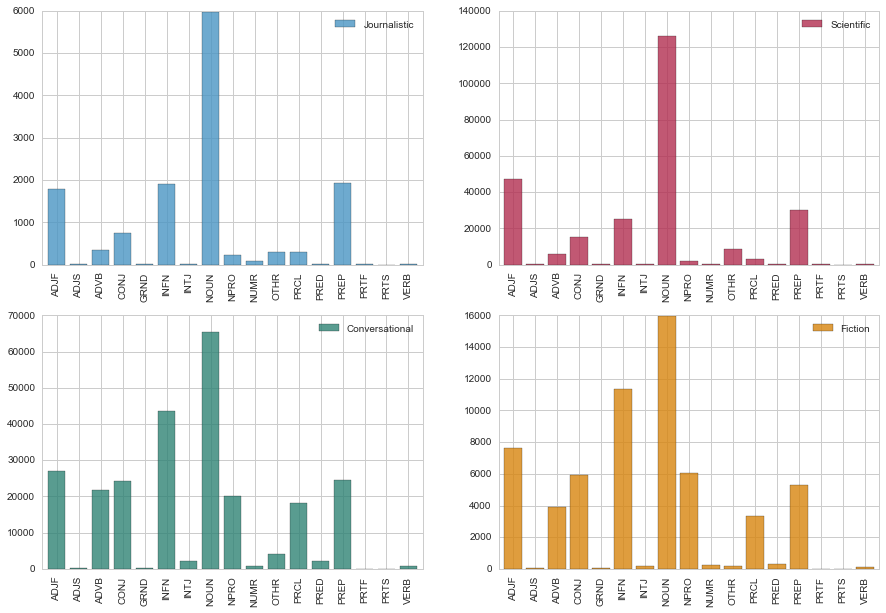

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

j_df.plot(ax=axes[0,0], kind='bar', color='#4A95C4', width = 0.8, alpha = 0.8) 
s_df.plot(ax=axes[0,1], kind='bar', color='#B22E50', width = 0.8, alpha = 0.8)
c_df.plot(ax=axes[1,0], kind='bar', color='#2F8375', width = 0.8, alpha = 0.8) 
f_df.plot(ax=axes[1,1], kind='bar', color='#D8850E', width = 0.8, alpha = 0.8)